In [27]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

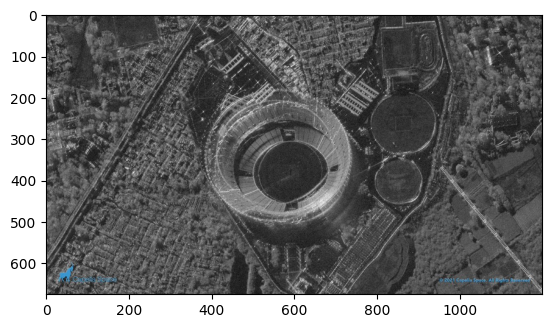

In [29]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)

Шум Гаусса

In [30]:
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, dtype=np.float32) #нулевой массив размера изображения
cv2.randn(noise_gauss, mean, stddev)

array([[ -0.3340598 , -40.674004  ,   0.75429296, ..., -22.086256  ,
         -4.9031243 , -20.230509  ],
       [ -8.304169  , -16.345615  , -30.43817   , ...,  26.963034  ,
          3.0973845 , -30.812588  ],
       [  6.1892667 , -32.1298    , -20.846706  , ...,  25.5617    ,
        -15.178213  , -12.7169895 ],
       ...,
       [ -6.8003697 , -17.981554  ,   6.8974366 , ...,  18.993797  ,
        -10.380063  ,  19.409925  ],
       [-12.776745  ,  64.997375  , -25.322577  , ...,  44.597523  ,
        -40.850876  ,   6.732804  ],
       [ 36.353695  , -14.109749  ,  54.76832   , ...,   9.273575  ,
        -46.436584  ,  29.050287  ]], shape=(675, 1200), dtype=float32)

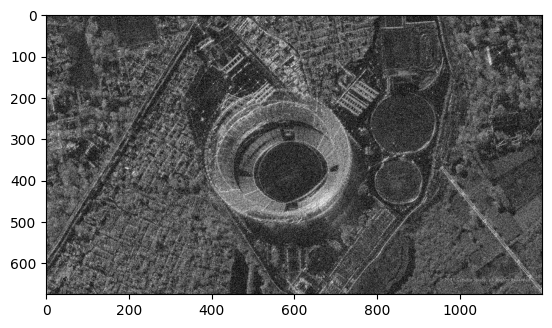

In [31]:
noisy_image = image_gray.astype(np.float32) + noise_gauss
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
plt.imshow(noisy_image, cmap='gray')

Постоянный шум

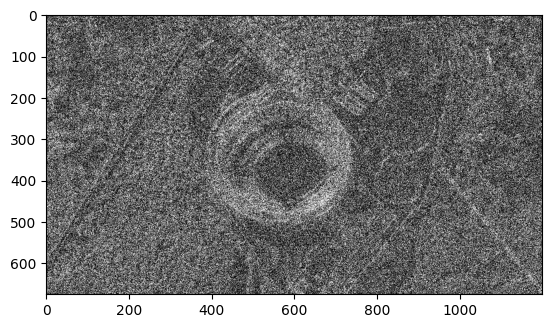

In [32]:
a = -210
b = 210

noise_uniform = np.random.uniform(a, b, image_gray.shape).astype(np.float32)

noisy_image_uniform = image_gray.astype(np.float32) + noise_uniform
noisy_image_uniform = np.clip(noisy_image_uniform, 0, 255).astype(np.uint8)
plt.imshow(noisy_image_uniform, cmap='gray')

## Тестирование алгоритмов подавления шума

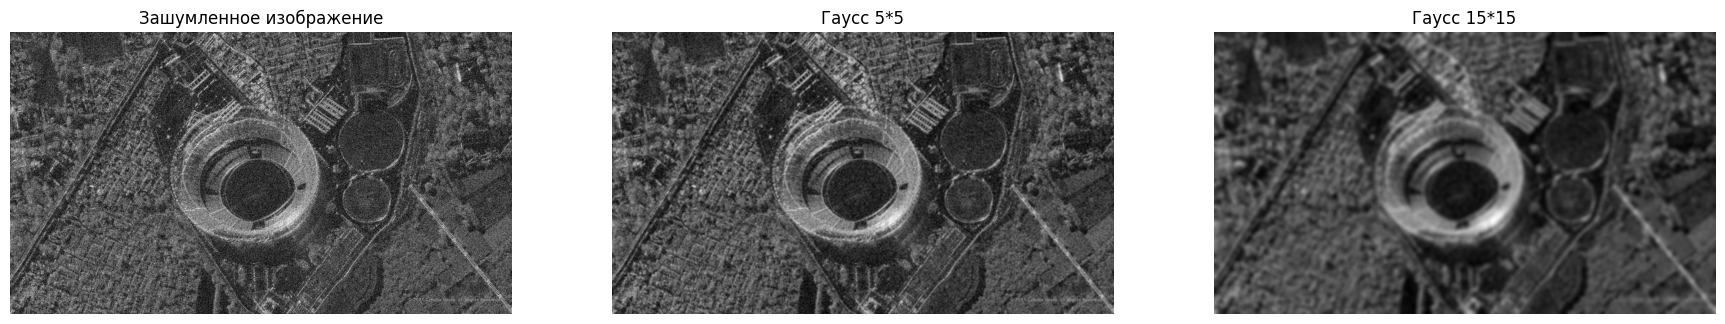

In [33]:
mse_values = []
ssim_values = []
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_gauss = cv2.GaussianBlur(noisy_image, (5, 5), 0)
plt.axis('off')
plt.title('Гаусс 5*5')
plt.imshow(image_gauss_gauss, cmap='gray')
plt.subplot(1,3,3)
image_gauss_gauss1 = cv2.GaussianBlur(noisy_image, (15, 15), 5)
plt.axis('off')
plt.title('Гаусс 15*15')
plt.imshow(image_gauss_gauss1, cmap='gray')


In [34]:
mse_gauss = mean_squared_error(image_gray, image_gauss_gauss)
(ssim_gauss, diff) = ssim(image_gray, image_gauss_gauss, full=True)
mse_values.append(mse_gauss)
ssim_values.append(ssim_gauss)
print(mse_gauss, ssim_gauss)

175.26663827160493 0.6781553802993272


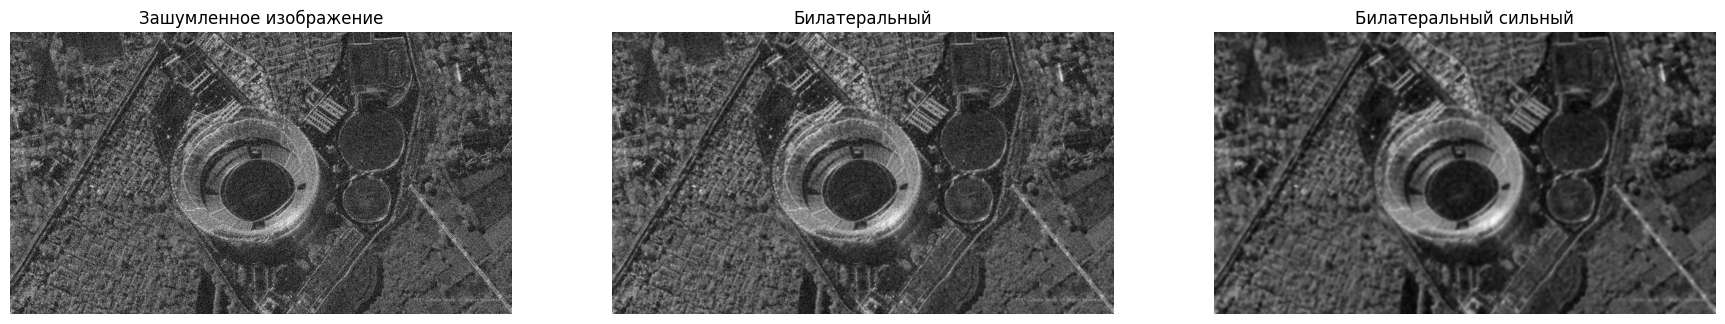

In [35]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_bilat = cv2.bilateralFilter(noisy_image, 5, 75, 75)
plt.imshow(image_gauss_bilat, cmap='gray')
plt.axis('off')
plt.title('Билатеральный')
plt.subplot(1,3,3)
image_gauss_bilat1 = cv2.bilateralFilter(noisy_image, 10, 100, 100)
plt.imshow(image_gauss_bilat1, cmap='gray')
plt.axis('off')
plt.title('Билатеральный сильный')
plt.show()

In [36]:
mse_bilat = mean_squared_error(image_gray, image_gauss_bilat)
(ssim_bilat, diff) = ssim(image_gray, image_gauss_bilat, full=True)
mse_values.append(mse_bilat)
ssim_values.append(ssim_bilat)
print(mse_bilat, ssim_bilat)

185.42242716049384 0.6663050386334977


Фильтр нелокальных средних

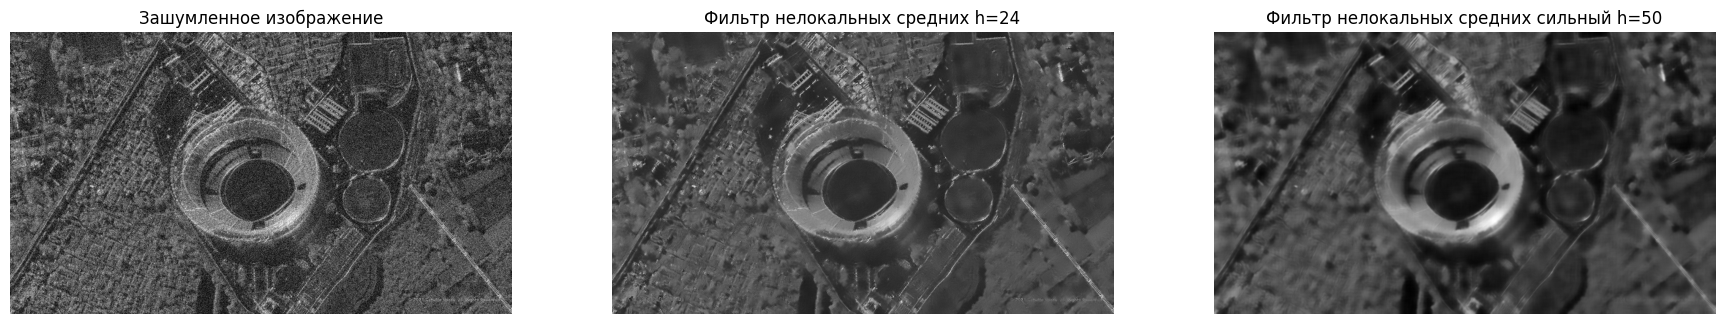

In [37]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_nlm = cv2.fastNlMeansDenoising(noisy_image, h = 24)
plt.imshow(image_gauss_nlm, cmap='gray')
plt.axis('off')
plt.title('Фильтр нелокальных средних h=24')
plt.subplot(1,3,3)
image_gauss_nlm1 = cv2.fastNlMeansDenoising(noisy_image, h = 50)
plt.imshow(image_gauss_nlm1, cmap='gray')
plt.axis('off')
plt.title('Фильтр нелокальных средних сильный h=50')
plt.show()

In [38]:
mse_nlm = mean_squared_error(image_gray, image_gauss_nlm,)
(ssim_nlm, diff) = ssim(image_gray, image_gauss_nlm, full=True)
mse_values.append(mse_nlm)
ssim_values.append(ssim_nlm)
print(mse_nlm, ssim_nlm)

207.7764962962963 0.613742209558077


In [39]:
best_mse = min(mse_values)
best_ssim = min(ssim_values)
print(best_mse, best_ssim)

175.26663827160493 0.613742209558077
